# Speech Emotion Recognition – Preprocessing
## Notebook 5: Data Balancing (Class Distribution) – with One Hot Encoding

**Registration Number:** ITxxxxxxxx  
**Task:** Check and balance class distribution, then encode labels with One Hot Encoding.  
**Objective:** Prevent bias toward majority classes and prepare balanced labels for ML models.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Check Class Distribution

Class distribution: Counter({'sad': 384, 'angry': 384, 'disgust': 384, 'happy': 382, 'fearful': 382, 'surprised': 382, 'calm': 380, 'neutral': 192})


C:\Users\MSI\AppData\Local\Temp\ipykernel_9944\2758217206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=counts.keys(), palette="viridis")


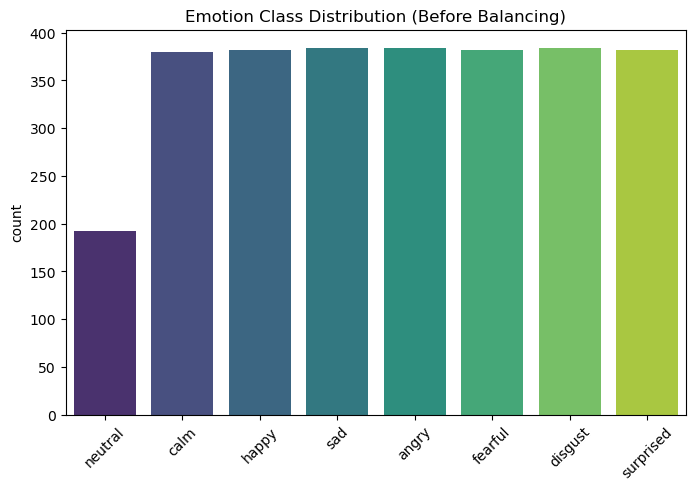

In [2]:
counts = Counter(y)
print("Class distribution:", counts)

plt.figure(figsize=(8,5))
sns.countplot(x=y, order=counts.keys(), palette="viridis")
plt.title("Emotion Class Distribution (Before Balancing)")
plt.xticks(rotation=45)
plt.show()

### Step 3: Apply Oversampling to Balance Classes

In [3]:
# Convert to DataFrame
df = pd.DataFrame(list(zip(list(X), y)), columns=["features", "emotion"])

# Find max class size
max_size = df["emotion"].value_counts().max()

# Oversample each class
dfs = []
for label, group in df.groupby("emotion"):
    dfs.append(resample(group, replace=True, n_samples=max_size, random_state=42))
df_balanced = pd.concat(dfs)

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("New class distribution:\n", df_balanced["emotion"].value_counts())

New class distribution:
 emotion
surprised    384
happy        384
sad          384
angry        384
neutral      384
calm         384
fearful      384
disgust      384
Name: count, dtype: int64


### Step 4: One Hot Encode Labels After Balancing

In [4]:
X_balanced = np.vstack(df_balanced["features"])
y_balanced = df_balanced["emotion"].values

encoder = OneHotEncoder(sparse_output=False)
y_balanced_ohe = encoder.fit_transform(y_balanced.reshape(-1,1))

print("Balanced Features shape:", X_balanced.shape)
print("Balanced One Hot Labels shape:", y_balanced_ohe.shape)
print("Classes:", encoder.categories_)

Balanced Features shape: (3072, 116)
Balanced One Hot Labels shape: (3072, 8)
Classes: [array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)]


### Step 5: Visualize Balanced Distribution

C:\Users\MSI\AppData\Local\Temp\ipykernel_9944\2994212827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, order=pd.Series(y_balanced).value_counts().index, palette="Set2")


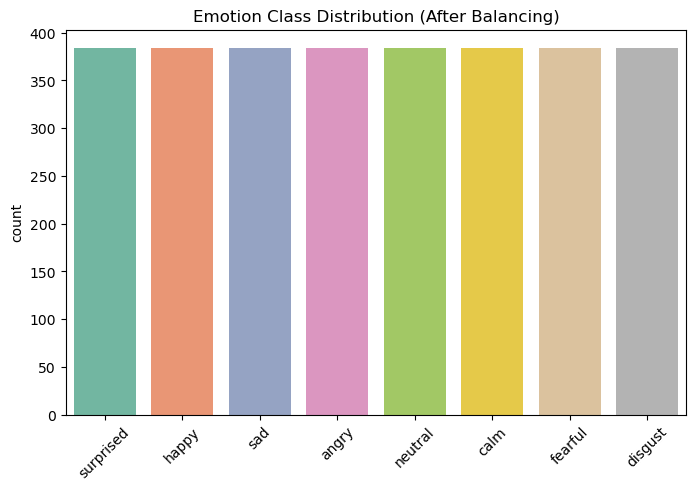

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x=y_balanced, order=pd.Series(y_balanced).value_counts().index, palette="Set2")
plt.title("Emotion Class Distribution (After Balancing)")
plt.xticks(rotation=45)
plt.show()

# ✅ Conclusion
- Checked original dataset → some classes had fewer samples.  
- Used **oversampling** to balance dataset.  
- Applied **One Hot Encoding** after balancing → final label format ready for ML.  
- Final dataset: (`X_balanced`, `y_balanced_ohe`) can now be used for training.